In [1]:
wd = '/home/jovyan';
addpath(fullfile(wd,'src'));
cd(fullfile(wd,'data'));

In [2]:
%-Input data
ref = fullfile(wd,'data','T1w.nii');
src = fullfile(wd,'data','bold.nii');

In [3]:
%-Reslice (for display...)
spm_reslice({ref,src}, struct('mean',false,'which',1));


SPM12: spm_reslice (v7141)                         15:04:04 - 12/03/2019
Completed                               :          15:04:08 - 12/03/2019


In [7]:
A = spm_slice_vol(spm_vol('T1w.nii'),spm_matrix([0 0 80]),[99 134],1);
F = spm_slice_vol(spm_vol('rbold.nii'),spm_matrix([0 0 80]),[99 134],1);
subplot(1,2,1),imagesc(rot90(A)),axis equal,axis tight,subplot(1,2,2),imagesc(rot90(F)),axis equal, axis tight

In [20]:
%-Coregister
x = spm_coreg(ref, src);


SPM12: spm_coreg (v7320)                           15:09:01 - 12/03/2019
Completed                               :          15:09:19 - 12/03/2019


In [21]:
%-Save transformation in NIfTI header
X  = spm_matrix(x);
M = spm_get_space(src);
spm_get_space(src, X\M);

In [22]:
%-Reslice
spm_reslice({ref,src}, struct('mean',false,'which',1));


SPM12: spm_reslice (v7141)                         15:09:38 - 12/03/2019
Completed                               :          15:09:39 - 12/03/2019


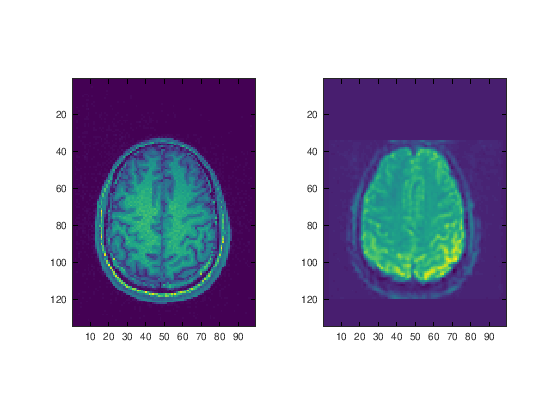

In [25]:
A = spm_slice_vol(spm_vol('T1w.nii'),spm_matrix([0 0 80]),[99 134],1);
F = spm_slice_vol(spm_vol('rbold.nii'),spm_matrix([0 0 80]),[99 134],1);
subplot(1,2,1),imagesc(rot90(A)),axis equal,axis tight,subplot(1,2,2),imagesc(rot90(F)),axis equal, axis tight